In [275]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display,HTML
%matplotlib inline

## 役立つリンク集
- https://hibiki-press.tech/learn_prog/python/format/1015#format
- https://qiita.com/NTeTN/items/ae973bfedfff248e4de6

In [221]:
pd.options.display.float_format = '{:.2f}'.format

In [71]:
read_file = "./datasets/Newyork/AB_NYC_2019.csv"

In [72]:
df = pd.read_csv('./datasets/Newyork/AB_NYC_2019.csv')

In [73]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [104]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                       float64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [105]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## 欠損値補完

### Name

- i think if item have same pair of (longitude and latitude) then same

In [24]:
df[df.name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN,NaN,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0


In [32]:
df[df.name.isnull()].groupby(['latitude','longitude']).count()['id']

Series([], Name: id, dtype: int64)

- 名前はユニークに保管

In [29]:
df.loc[df.name.isnull(),'name'] = pd.Series([ 'name_'+str(_i) for _i in range(len(df.name.isnull()))])

### host name
- similar to name

In [34]:
df[df.host_name.isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [36]:
df[df.host_name.isnull()].groupby(['latitude','longitude']).count()['id']

latitude  longitude
40.64345  -73.93643    1
40.64965  -73.96154    1
40.65152  -73.95271    1
40.65263  -73.93215    1
40.67512  -73.96146    1
40.70146  -73.92792    1
40.71838  -73.95630    1
40.72035  -73.95355    1
40.72413  -73.76133    1
40.73539  -73.95838    1
40.73949  -73.99801    1
40.75656  -73.99063    1
40.75668  -73.99097    1
40.75835  -73.99065    1
40.76436  -73.96836    1
40.77587  -73.91775    1
40.77701  -73.97667    1
40.79766  -73.94824    1
40.80606  -73.95061    1
40.82929  -73.94182    1
40.83844  -73.92489    1
Name: id, dtype: int64

- all host name is unique, but I wonder that there is no "name" host.
- compliment values same as Name
- でも。hostnameが無いってやばいと思うの。

In [42]:
df.loc[df.host_name.isnull(),'host_name'] = pd.Series([ 'hostname_'+str(_i) for _i in range(len(df.host_name.isnull()))])

- reviews_per_month
- 単純にthere is no guest who give review なので、０

In [53]:
df[df.reviews_per_month==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [54]:
df.reviews_per_month.fillna(0,inplace=True)

In [55]:
df[df.last_review  0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


- last_review はそもそも重要なのか
    - 直近でレビューもらった数なんて..

In [74]:
df.last_review = pd.to_datetime(df.last_review,format='%Y-%m-%d')

In [75]:
date_recently = df.last_review.max()

In [78]:
df.last_review = (date_recently- df.last_review).apply(lambda _date: _date.days)

/Users/macico/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(0, 1000)

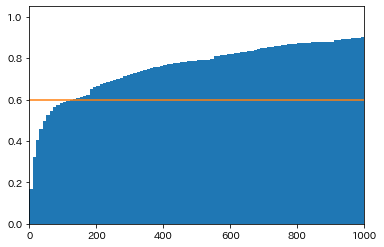

In [106]:
_date_max = int(df.last_review.max())
plt.hist(df.last_review.dropna(),bins=range(0,_date_max,10),normed=True,cumulative=True)
plt.plot(range(_date_max),[0.6 for i in range(_date_max)])
plt.xlim([0,1000])

- 　ふーんていうお気持ちになった
- 多分意味ない。
    - 他にreviewに関しては情報が他の要素で補填できる
        -　なぜなら、値があっても、多分黄色いライン以上は多分同等の扱いになると思うから 
- なので、このカラム自体を消してもいいと思う


In [108]:
del df['last_review']

## feature確認

In [111]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [114]:
#お部屋タイプ
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [115]:
#エリア
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [116]:
#地名
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [182]:
def cal_set(a):
    return len(set(a))/float(len(set(df.host_name)))

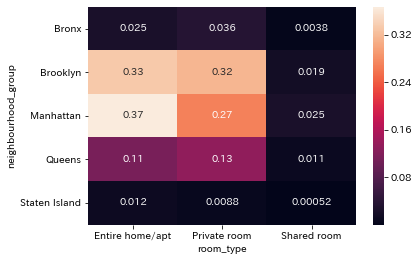

In [184]:
df_tmp = pd.pivot_table(df,index='neighbourhood_group',columns='room_type',values='host_name',aggfunc=cal_set)
sns.heatmap(data=df_tmp, annot=True)

- 結局、場所とタイプは割と限定されてくるんだね

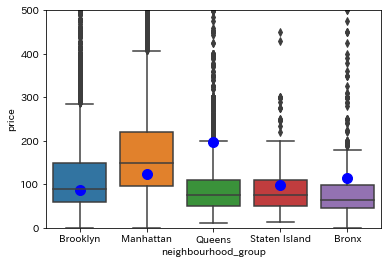

In [242]:
col = 'neighbourhood_group'
df_tmp_mean = df.groupby(col)['price'].mean()
plt.ylim([0,500])
ax = sns.boxplot(x=col,y='price',data=df)
for i, _label in enumerate(ax.get_xticklabels()):
    plt.plot(i,df_tmp_mean[i],marker='o', markersize=10,color='b')
# for _key in list(set(df[col])):
#     df_stat = df.loc[df[col] == _key].price.describe()

/Users/macico/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


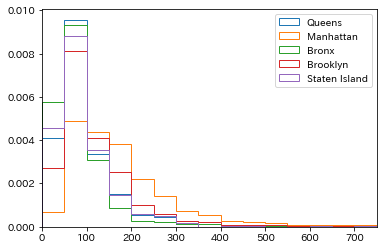

In [258]:
for i, _label in enumerate(set(df[col])):
    plt.hist(df[df[col]==_label]['price'],label=_label,bins=range(0,10000,50),normed=True,alpha=1, histtype="step")
plt.xlim(0,750)
plt.legend()


([<matplotlib.axis.XTick at 0x12c6ae978>,
 <a list of 15 Text xticklabel objects>)

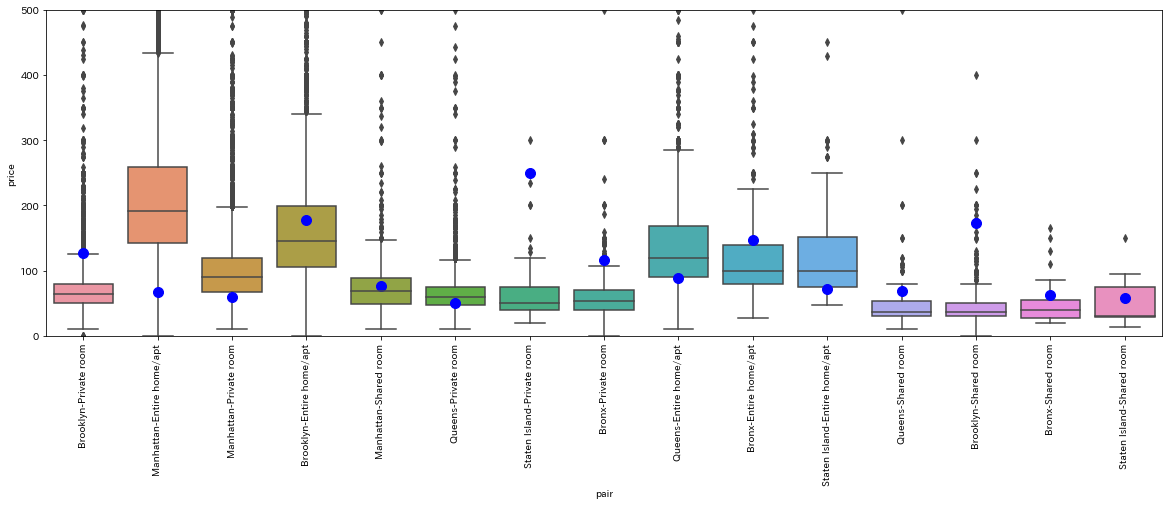

In [269]:
col = 'pair'
df['pair'] = df.neighbourhood_group + '-'+df.room_type
df_tmp_mean = df.groupby(col)['price'].mean()
fig = plt.figure(figsize=(20.0, 6.0))
plt.ylim([0,500])
ax = sns.boxplot(x=col,y='price',data=df)
for i, _label in enumerate(ax.get_xticklabels()):
    plt.plot(i,df_tmp_mean[i],marker='o', markersize=10,color='b')
# for _key in list(set(df[col])):
#     df_stat = df.loc[df[col] == _key].price.describe()
plt.xticks(range(len(ax.get_xticklabels())), ax.get_xticklabels(), rotation=90)

- マンハッタンはやっぱりいっぱい宿構えているんだね。
    - 現実的に値段が1000ドルとか高すぎだろってことで、良心的な値段
    - 値段相場は面白い。この図は興味深い。アホみたいに高いものが存在するQueensとかね
    - heatmap では二極化して、各区分で同じ数くらいいるけど、それぞれで値段の帯域が違うね。特にブルックリン

<BarContainer object of 221 artists>

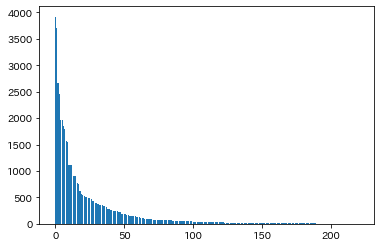

In [276]:
plt.bar(range(len(df.neighbourhood.value_counts())),df.neighbourhood.value_counts().values)

### 楽しそうな図たち

In [272]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df.latitude,df.longitude,df.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

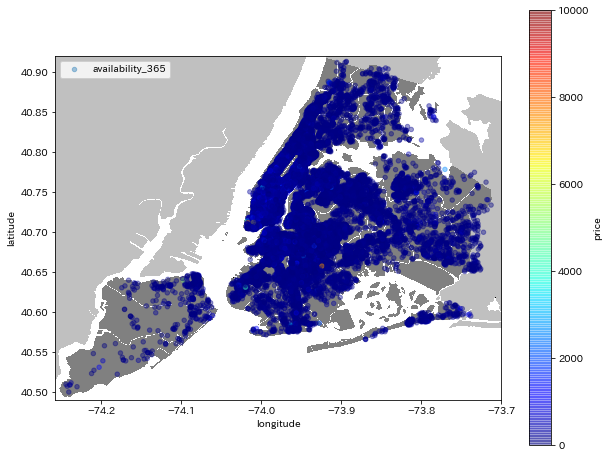

In [274]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

### 実際に予測してみる

https://www.kaggle.com/jrw2200/smart-pricing-with-xgb-rfr-interpretations#SUMMARY